In [1]:
import numpy as np
from Code import *
from Code.environment import *
from Code.data import *

from Code.environment.Environment import Environment

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 10
p_lambda = 0.5
graph_json = "business_full_graph.json"

arms = np.array([
    [20, 12, 15, 10],
    [3, 4, 1, 8],
    [24, 13, 18, 21],
    [15, 12, 18, 20],
    [12, 15, 19, 21]
  ])
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

In [3]:
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

In [4]:
import numpy as np

In [5]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 1000

# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

for t in range(TIME_HORIZON):
    super_arm = gr_learner.select_superarm()
    report = environment.round(super_arm)
    gr_learner.update(super_arm.copy(), report)
print(gr_learner.get_all_pulled())

[[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0], [0, 2, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 1, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 

In [6]:
import matplotlib.pyplot as plt


In [7]:
rewards = gr_learner.get_rewards()
print(rewards)


[2884, 2936, 1318, 1644, 2344, 1928, 1768, 1667, 2061, 1946, 1906, 2063, 1649, 1971, 2184, 1733, 1984, 1596, 1773, 1901, 1611, 2777, 1969, 2048, 2131, 2190, 1808, 2172, 2520, 1730, 1880, 1934, 1778, 2720, 1809, 1997, 1962, 3366, 2307, 1571, 2088, 1681, 1811, 2117, 2856, 1783, 2288, 1714, 2368, 2209, 2232, 1291, 1780, 1946, 2350, 1768, 2310, 1952, 1619, 2165, 1702, 2117, 2273, 2227, 1914, 1838, 2099, 2338, 2218, 2194, 2262, 1967, 1530, 2242, 2720, 1939, 2644, 2018, 1725, 2949, 2364, 2444, 2431, 2302, 2454, 2220, 2373, 1874, 1664, 3044, 1848, 2040, 2132, 2454, 1655, 2802, 2198, 2971, 1790, 2406, 2463, 2106, 1935, 2066, 2140, 1944, 2364, 2112, 2585, 2471, 2056, 2607, 1842, 1495, 1795, 1504, 1283, 2318, 1697, 2142, 2079, 2660, 1814, 2213, 2334, 2182, 2323, 2266, 1916, 2573, 2680, 2130, 2145, 2158, 1677, 1305, 2103, 1203, 1526, 2868, 2337, 2081, 2585, 2389, 1392, 1686, 2498, 2234, 3086, 1232, 2735, 2327, 1537, 1722, 1899, 1656, 1277, 2096, 2027, 1674, 1866, 1926, 2992, 1630, 1729, 2127, 267

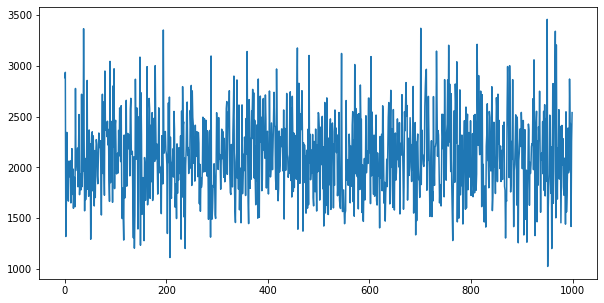

In [8]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.show()

In [12]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )
ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)

In [17]:
percentage_loading = 10
checkpoints = [ckp for ckp in range(0, TIME_HORIZON, int(TIME_HORIZON / percentage_loading))]
checkpoints

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
for t in range(TIME_HORIZON):
    if t in checkpoints:
        print("{}/{}".format(t, TIME_HORIZON))
    super_arm = ucb1_learner.select_superarm()
    report = environment.round(super_arm)
    ucb1_learner.update(super_arm.copy(), report)

0/1000
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000


In [20]:
rewards = ucb1_learner.history_rewards
print(rewards)


[1549, 2305, 2059, 835, 2453, 1566, 1896, 1574, 2049, 2845, 1180, 1503, 1753, 1035, 1390, 1902, 1885, 1617, 1618, 2135, 1568, 1459, 2907, 1776, 2436, 1355, 1571, 1680, 1264, 1633, 1591, 1903, 1982, 1697, 2022, 2595, 1911, 1856, 1690, 1404, 1302, 1129, 1938, 1616, 1611, 1747, 2342, 1729, 620, 1285, 2069, 1961, 2275, 2212, 1918, 1153, 1153, 1099, 1983, 2194, 1499, 1564, 1628, 1325, 1320, 1636, 1796, 2344, 1673, 1929, 2208, 1843, 2309, 1507, 2260, 1397, 1370, 1470, 1694, 1910, 1258, 1708, 1306, 1145, 2299, 1507, 1364, 2285, 1844, 2072, 1799, 1670, 1255, 1853, 1614, 1110, 1723, 2252, 1819, 1195, 1465, 1673, 1446, 2130, 1231, 1287, 1499, 1422, 2535, 1637, 1848, 1612, 2772, 1264, 2318, 1844, 1857, 2332, 2489, 898, 1816, 1455, 1168, 1538, 1887, 1132, 2219, 1762, 1586, 1528, 1112, 1845, 2114, 1567, 840, 1467, 1560, 1431, 2796, 1257, 1754, 1847, 1339, 1095, 1682, 2013, 2617, 1461, 2519, 1777, 1678, 1124, 1654, 1406, 1741, 1505, 1529, 1763, 1571, 1415, 1469, 2228, 1834, 1792, 1333, 1387, 1531, 2

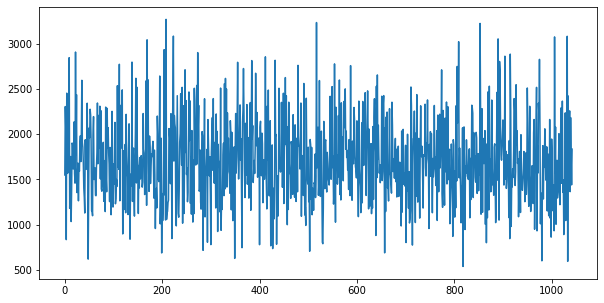

In [21]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.show()